In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./data/onlineOrder_cleaned.csv')


In [4]:
data.head(1)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>InvoiceNo</th>
      <th>StockCode</th>
      <th>Description</th>
      <th>Quantity</th>
      <th>InvoiceDate</th>
      <th>UnitPrice</th>
      <th>CustomerID</th>
      <th>Country</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>536365</td>
      <td>85123A</td>
      <td>WHITE HANGING HEART T-LIGHT HOLDER</td>
      <td>6</td>
      <td>2010-12-01 08:26:00</td>
      <td>2.55</td>
      <td>17850.0</td>
      <td>United Kingdom</td>
    </tr>
  </tbody>
</table>
</div>

In [5]:
customers_df = pd.DataFrame()

In [6]:
groups = data.groupby('CustomerID').max()['InvoiceDate']
customers_df['CustomerID'] = groups.index
customers_df['maxInvoiceDate'] = groups.values


In [7]:
from datetime import datetime
NOW_TIME_STR = '2012'
now_time = datetime.strptime(NOW_TIME_STR, '%Y')

In [8]:
import numpy as np

# customers_df['recency'] = np.array([pd.datetime.now()] * len(customers_df)) - pd.to_datetime(customers_df['maxInvoiceDate'])
customers_df['recency_delta'] = np.array([now_time] * len(customers_df)) - pd.to_datetime(customers_df['maxInvoiceDate'])
customers_df['RecencyValue'] = customers_df['recency_delta'].dt.days

In [9]:
customers_df.head(1)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CustomerID</th>
      <th>maxInvoiceDate</th>
      <th>recency_delta</th>
      <th>RecencyValue</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>12346.0</td>
      <td>2011-01-18 10:01:00</td>
      <td>347 days 13:59:00</td>
      <td>347</td>
    </tr>
  </tbody>
</table>
</div>

In [10]:
MIN_TIME_STR = '2010-12-01 08:26:00'
MAX_TIME_STR = '2011-12-09 12:50:00'


In [11]:
time_select = (data['InvoiceDate'] > MIN_TIME_STR) & (data['InvoiceDate'] < MAX_TIME_STR)

In [12]:
customers_df['FrequencyValue'] = data[time_select].groupby('CustomerID').count()['Quantity'].values

In [13]:
data['price'] = data['UnitPrice'] * data['Quantity']
customers_df['MonetaryValue'] = data[time_select].groupby('CustomerID').sum()['price'][customers_df['CustomerID']].values

In [14]:
# (data[time_select].groupby('CustomerID').sum()['price'] == data[time_select].groupby('CustomerID').sum()['price'][customers_df['CustomerID']]).all()

In [15]:
customers_df.head(4)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CustomerID</th>
      <th>maxInvoiceDate</th>
      <th>recency_delta</th>
      <th>RecencyValue</th>
      <th>FrequencyValue</th>
      <th>MonetaryValue</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>12346.0</td>
      <td>2011-01-18 10:01:00</td>
      <td>347 days 13:59:00</td>
      <td>347</td>
      <td>1</td>
      <td>77183.60</td>
    </tr>
    <tr>
      <th>1</th>
      <td>12347.0</td>
      <td>2011-12-07 15:52:00</td>
      <td>24 days 08:08:00</td>
      <td>24</td>
      <td>182</td>
      <td>4310.00</td>
    </tr>
    <tr>
      <th>2</th>
      <td>12348.0</td>
      <td>2011-09-25 13:13:00</td>
      <td>97 days 10:47:00</td>
      <td>97</td>
      <td>31</td>
      <td>1797.24</td>
    </tr>
    <tr>
      <th>3</th>
      <td>12349.0</td>
      <td>2011-11-21 09:51:00</td>
      <td>40 days 14:09:00</td>
      <td>40</td>
      <td>73</td>
      <td>1757.55</td>
    </tr>
  </tbody>
</table>
</div>

In [16]:
customers_df.describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CustomerID</th>
      <th>recency_delta</th>
      <th>RecencyValue</th>
      <th>FrequencyValue</th>
      <th>MonetaryValue</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>4339.000000</td>
      <td>4339</td>
      <td>4339.000000</td>
      <td>4339.000000</td>
      <td>4339.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>15299.936852</td>
      <td>114 days 11:55:04.217561</td>
      <td>114.041484</td>
      <td>91.703618</td>
      <td>2053.703465</td>
    </tr>
    <tr>
      <th>std</th>
      <td>1721.889758</td>
      <td>100 days 00:12:41.390939</td>
      <td>100.007757</td>
      <td>228.792142</td>
      <td>8988.245139</td>
    </tr>
    <tr>
      <th>min</th>
      <td>12346.000000</td>
      <td>22 days 11:10:00</td>
      <td>22.000000</td>
      <td>1.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>13812.500000</td>
      <td>39 days 12:49:30</td>
      <td>39.000000</td>
      <td>17.000000</td>
      <td>307.245000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>15299.000000</td>
      <td>72 days 13:13:00</td>
      <td>72.000000</td>
      <td>41.000000</td>
      <td>673.260000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>16778.500000</td>
      <td>163 days 23:40:00</td>
      <td>163.500000</td>
      <td>100.000000</td>
      <td>1661.640000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>18287.000000</td>
      <td>395 days 14:07:00</td>
      <td>395.000000</td>
      <td>7847.000000</td>
      <td>280206.020000</td>
    </tr>
  </tbody>
</table>
</div>

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
plt.hist(customers_df['FrequencyValue'], bins=30)

(array([4.037e+03, 2.300e+02, 4.300e+01, 1.000e+01, 7.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 2.62533333e+02, 5.24066667e+02, 7.85600000e+02,
        1.04713333e+03, 1.30866667e+03, 1.57020000e+03, 1.83173333e+03,
        2.09326667e+03, 2.35480000e+03, 2.61633333e+03, 2.87786667e+03,
        3.13940000e+03, 3.40093333e+03, 3.66246667e+03, 3.92400000e+03,
        4.18553333e+03, 4.44706667e+03, 4.70860000e+03, 4.97013333e+03,
        5.23166667e+03, 5.49320000e+03, 5.75473333e+03, 6.01626667e+03,
        6.27780000e+03, 6.53933333e+03, 6.80086667e+03, 7.06240000e+03,
        7.32393333e+03, 7.58546667e+03, 7.84700000e+03]),
 <a list of 30 Patch objects>)

In [19]:
customers_df['FrequencyScore'] = customers_df['FrequencyValue'].apply(lambda x: (x > 17) + (x > 41) + (x > 100))

In [20]:
plt.hist(customers_df['FrequencyScore'])

(array([1109.,    0.,    0., 1072.,    0.,    0., 1078.,    0.,    0.,
        1080.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [21]:
plt.hist(customers_df['RecencyValue'])

(array([1884.,  798.,  375.,  241.,  222.,  193.,  186.,  170.,  140.,
         130.]),
 array([ 22. ,  59.3,  96.6, 133.9, 171.2, 208.5, 245.8, 283.1, 320.4,
        357.7, 395. ]),
 <a list of 10 Patch objects>)

(array([536., 568., 564., 449., 495., 376., 282., 322., 370., 377.]),
 array([3.09104245, 3.37982678, 3.66861112, 3.95739545, 4.24617978,
        4.53496411, 4.82374844, 5.11253277, 5.4013171 , 5.69010143,
        5.97888576]),
 <a list of 10 Patch objects>)

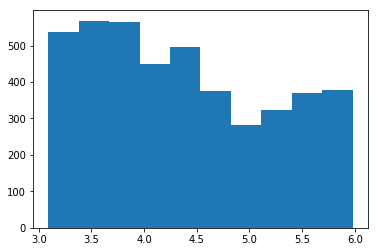

In [23]:
plt.hist(np.log(customers_df['RecencyValue']))

In [24]:
customers_df['MonetaryScore'] = customers_df['MonetaryValue'].apply(lambda x: (x > 307) + (x > 673) + (x > 1661))

(array([4.304e+03, 1.800e+01, 9.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([     0.   ,  28020.602,  56041.204,  84061.806, 112082.408,
        140103.01 , 168123.612, 196144.214, 224164.816, 252185.418,
        280206.02 ]),
 <a list of 10 Patch objects>)

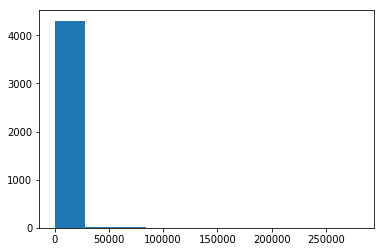

In [25]:
# selected = customers_df['monetary_value'] < 10000 
plt.hist(customers_df['MonetaryValue'])


In [26]:
# customers_df2 = pd.DataFrame(minMaxScaler
#   .fit_transform(customers_df[['recency_normal', 'frequency_normal', 
#   'monetary_value_normal']]) .astype(int), columns=[['recency_normal', 'frequency_normal', 'monetary_value_normal']]) 

In [27]:
# from sklearn.preprocessing import MinMaxScaler
# minMaxScaler = MinMaxScaler((0, 3))

In [28]:
customers_df['RecencyScore'] = customers_df['RecencyValue'].apply(lambda x: (x > 39) + (x > 72) + (x > 163))
# customers_df['recency_normal'] = minMaxScaler.fit_transform(np.log(customers_df['recency']).reshape(-1, 1))
# customers_df2 = pd.DataFrame(minMaxScaler
#                              .fit_transform(customers_df[['recency', 'frequency', 'monetary_value']])
#                              .astype(int), columns=[['recency_normal', 'frequency_normal', 'monetary_value_normal']])

(array([1104.,    0.,    0., 1073.,    0.,    0., 1077.,    0.,    0.,
        1085.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

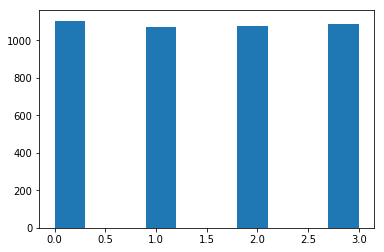

In [29]:
plt.hist(customers_df['RecencyScore'])


In [30]:
customers_df.describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CustomerID</th>
      <th>recency_delta</th>
      <th>RecencyValue</th>
      <th>FrequencyValue</th>
      <th>MonetaryValue</th>
      <th>FrequencyScore</th>
      <th>MonetaryScore</th>
      <th>RecencyScore</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>4339.000000</td>
      <td>4339</td>
      <td>4339.000000</td>
      <td>4339.000000</td>
      <td>4339.000000</td>
      <td>4339.000000</td>
      <td>4339.000000</td>
      <td>4339.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>15299.936852</td>
      <td>114 days 11:55:04.217561</td>
      <td>114.041484</td>
      <td>91.703618</td>
      <td>2053.703465</td>
      <td>1.490666</td>
      <td>1.501498</td>
      <td>1.493893</td>
    </tr>
    <tr>
      <th>std</th>
      <td>1721.889758</td>
      <td>100 days 00:12:41.390939</td>
      <td>100.007757</td>
      <td>228.792142</td>
      <td>8988.245139</td>
      <td>1.122137</td>
      <td>1.118471</td>
      <td>1.122159</td>
    </tr>
    <tr>
      <th>min</th>
      <td>12346.000000</td>
      <td>22 days 11:10:00</td>
      <td>22.000000</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>13812.500000</td>
      <td>39 days 12:49:30</td>
      <td>39.000000</td>
      <td>17.000000</td>
      <td>307.245000</td>
      <td>0.000000</td>
      <td>1.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>15299.000000</td>
      <td>72 days 13:13:00</td>
      <td>72.000000</td>
      <td>41.000000</td>
      <td>673.260000</td>
      <td>1.000000</td>
      <td>2.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>16778.500000</td>
      <td>163 days 23:40:00</td>
      <td>163.500000</td>
      <td>100.000000</td>
      <td>1661.640000</td>
      <td>2.000000</td>
      <td>3.000000</td>
      <td>2.500000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>18287.000000</td>
      <td>395 days 14:07:00</td>
      <td>395.000000</td>
      <td>7847.000000</td>
      <td>280206.020000</td>
      <td>3.000000</td>
      <td>3.000000</td>
      <td>3.000000</td>
    </tr>
  </tbody>
</table>
</div>

In [31]:
# customers_df2.describe()

In [32]:
# customers_df2['recency_normal']

In [33]:
customers_df[['CustomerID', 'RecencyScore', 'FrequencyScore', 'MonetaryScore']]\
    .to_csv('./data/prepared/prepared_rfm.csv', index=False) 